In [1]:
import pandas as pd

file_path = "sales_data.csv"


df= pd.read_csv(file_path, encoding='cp1252') 


df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
cols = ['SALES', 'YEAR_ID', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY']
df = df[cols].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SALES        2823 non-null   float64
 1   YEAR_ID      2823 non-null   int64  
 2   QTR_ID       2823 non-null   int64  
 3   MONTH_ID     2823 non-null   int64  
 4   PRODUCTLINE  2823 non-null   object 
 5   COUNTRY      2823 non-null   object 
 6   TERRITORY    1749 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 154.5+ KB
None


In [5]:
data = df.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749 entries, 1 to 2821
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SALES        1749 non-null   float64
 1   YEAR_ID      1749 non-null   int64  
 2   QTR_ID       1749 non-null   int64  
 3   MONTH_ID     1749 non-null   int64  
 4   PRODUCTLINE  1749 non-null   object 
 5   COUNTRY      1749 non-null   object 
 6   TERRITORY    1749 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 109.3+ KB


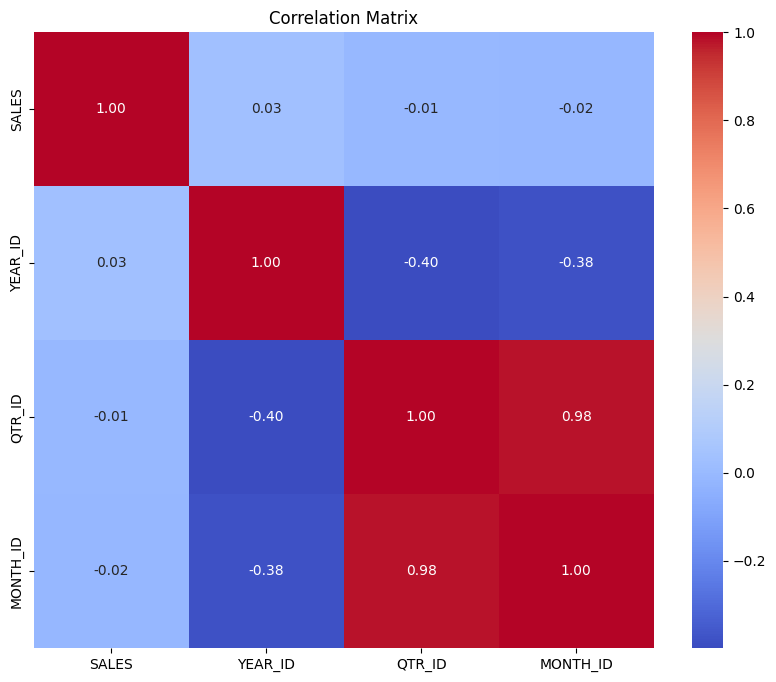

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

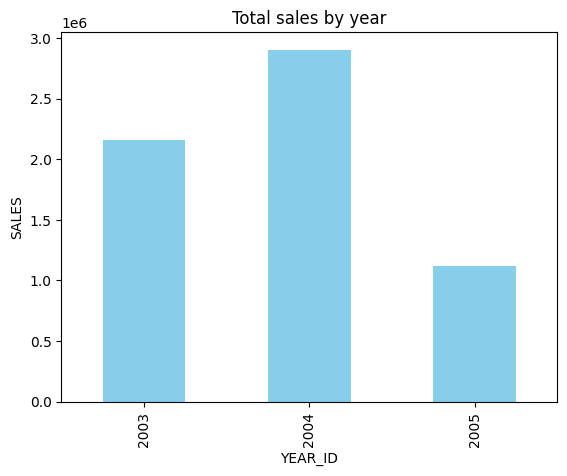

In [7]:

sales_by_year = data.groupby('YEAR_ID')['SALES'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total sales by year')
plt.xlabel('YEAR_ID')
plt.ylabel('SALES')
plt.show()

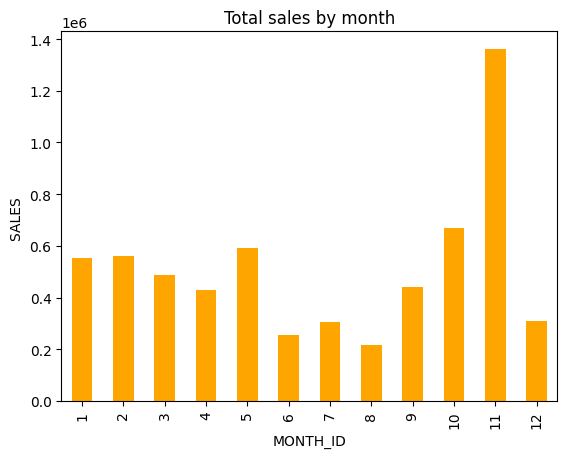

In [8]:
sales_by_month = data.groupby('MONTH_ID')['SALES'].sum()
sales_by_month.plot(kind='bar', color='orange')
plt.title('Total sales by month')
plt.xlabel('MONTH_ID')
plt.ylabel('SALES ')
plt.show()

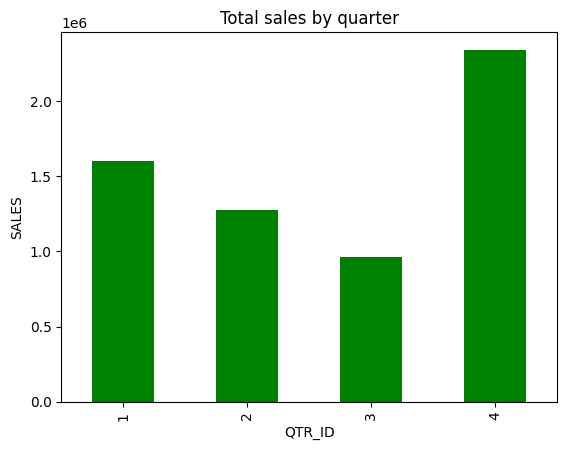

In [9]:
sales_by_month = data.groupby('QTR_ID')['SALES'].sum()
sales_by_month.plot(kind='bar', color='green')
plt.title('Total sales by quarter')
plt.xlabel('QTR_ID')
plt.ylabel('SALES')
plt.show()

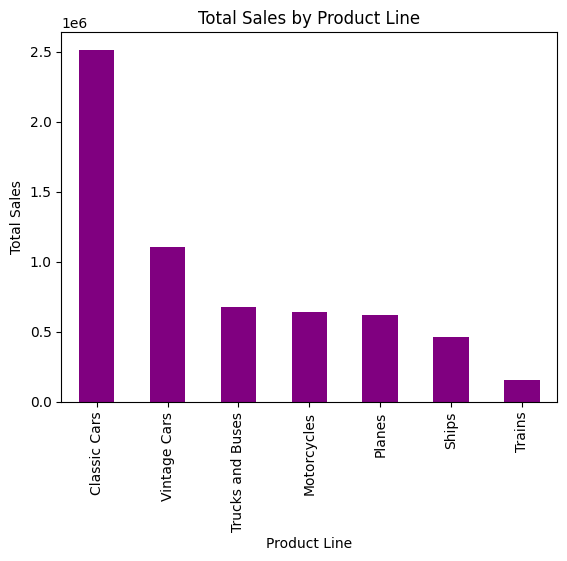

In [10]:
sales_by_productline = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sales_by_productline.plot(kind='bar', color='purple')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

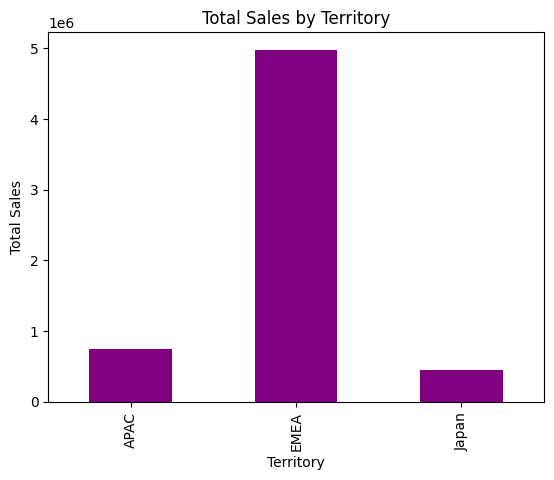

In [11]:
sales_by_territory = data.groupby('TERRITORY')['SALES'].sum()
sales_by_territory.plot(kind='bar', color='purple')
plt.title('Total Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.show()

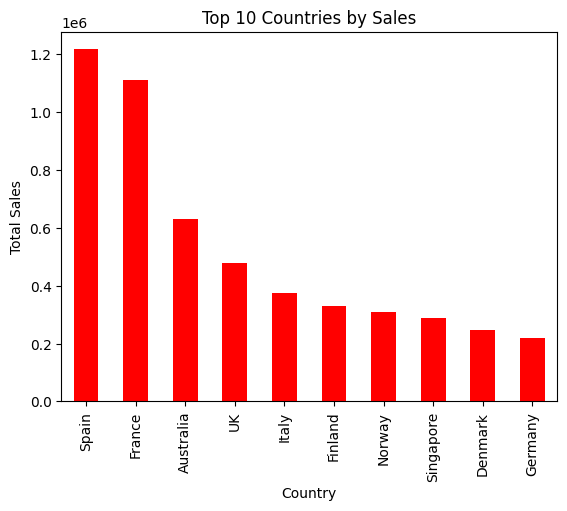

In [12]:
top_countries = data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='red')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['YEAR_ID', 'QTR_ID', 'MONTH_ID']]
y = data['SALES']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 0.002111908053309408


In [14]:
print("R-squared:", r2_score(y, y_pred))
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

R-squared: 0.002111908053309408
YEAR_ID: 84.82149396505011
QTR_ID: 266.09671731088116
MONTH_ID: -87.09175530286387


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd

# اختيار الأعمدة
clustering_data = data[['PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'SALES']].copy()

# تحويل DealSize و Country إلى أرقام
encoder = LabelEncoder()
clustering_data['COUNTRY'] = encoder.fit_transform(clustering_data['COUNTRY'])
clustering_data['TERRITORY'] = encoder.fit_transform(clustering_data['TERRITORY'])

# معاينة
clustering_data.head()


,PRODUCTLINE,COUNTRY,TERRITORY,SALES
1,Motorcycles,5,1,2765.90
2,Motorcycles,5,1,3884.34
6,Motorcycles,5,1,2497.77
7,Motorcycles,10,1,5512.32
9,Motorcycles,5,1,4708.44


In [18]:
# تطبيق K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data[['SALES', 'COUNTRY', 'TERRITORY']])

# عرض متوسط المبيعات في كل مجموعة
cluster_summary = clustering_data.groupby('Cluster')['SALES'].mean()
print(cluster_summary)


c:\Users\HSN\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HSN\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Cluster
0    2100.756714
1    6913.459921
2    4069.955107
Name: SALES, dtype: float64


In [21]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8,6))
# plt.scatter(clustering_data['SALES'], clustering_data['COUNTRY'], 
#             c=clustering_data['Cluster'], cmap='viridis')
# plt.title('Product Segmentation by Sales and Country')
# plt.xlabel('Sales')
# plt.ylabel('Country (encoded)')
# plt.show()


In [20]:
data.to_csv("cleaned_1.csv", index=False)



#  **Sales Data Analysis Project Report**

## **1️ Objective**

Analyze company sales data to identify:

* Yearly and monthly sales trends.
* Top-performing products and regions.


---

## **2️ Data Sources**

* **Dataset:** `sales_data.csv`
* **Columns Used:**

  * `YEAR_ID`, `MONTH_ID`, `QTR_ID` — for time analysis.
  * `PRODUCTLINE`, `COUNTRY`, `TERRITORY`, `SALES` — for product and region performance.
* **Source:** Internal company database or CSV export from ERP system.

---

## **3️ Data Preparation**

### Cleaning Steps:

* Removed missing and duplicate records.
* Converted date columns to datetime format.
* Calculated total sales:
  `SALES = QUANTITYORDERED * PRICEEACH`.

### Feature Selection:

Kept only relevant attributes for analysis:
`['YEAR_ID', 'MONTH_ID', 'QTR_ID', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'SALES']`.

---

## **4️ Exploratory Data Analysis (EDA)**

### Key Findings:

* Sales remained relatively stable across years (low R² ≈ 0.0021).
* Strong correlation between `QTR_ID` and `MONTH_ID` (≈ 0.98).
* Product categories show major differences in total revenue.
* Certain regions (e.g., EMEA, NA) dominate overall sales.

### Visualizations:

* **Bar charts:** Sales by Year, Month, Product Line, Territory.
* **Heatmap:** Correlation between numeric variables.
* **Outliers:** High-value sales identified in specific markets.

---

## **5️ Advanced Analysis**

###  Regression:

Model: `SALES ~ YEAR_ID + QTR_ID + MONTH_ID`
→ **R² = 0.0021** → time factors have minimal effect on sales.

###  Clustering (K-Means):

* Features: `COUNTRY`, `TERRITORY`, `SALES`.
* Identified **3 main clusters**:

  1. Low-sales countries
  2. Medium-sales markets
  3. High-value markets (potential strategic targets)

---

## **6️ Power BI Dashboard**

### Pages and Components:

1. **Overview Page**

   * KPIs: Total Sales, Avg Sales, Top Product Line
2. **Sales Trends**

   * Line chart by Year and Month
3. **Product Performance**

   * Bar chart for top 10 products
4. **Regional Map**

   * Filled Map showing sales by Country
5. **Customer Segmentation**

   * Cluster chart displaying 3 K-Means clusters

### Interactive Features:

* Slicers: Year, Product Line, Territory
* Drill-down by country or time period
* Dynamic filters for performance comparison

---



